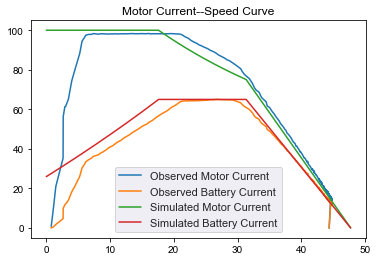

In [1]:
# import library to read vehicle data
import sys
sys.path.append('../ev_data')
import ev_data as evd

# import library for closed form solution
import ev_model as evc

# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# read in and plot vehicle motor and battery current
data = evd.vesc_csv_to_df('data.csv')
data = evd.pull_throttle_region(data)
data['rad_per_sec'] = evd.rpm_to_radpsec(data, pole_pairs=23)
plt.plot(data['rad_per_sec'], data['current_motor'], label='Observed Motor Current')
plt.plot(data['rad_per_sec'], data['current_in'], label='Observed Battery Current')

# define system variables, set up simulation and plot
variables = evc.define_variables()
equations = evc.define_equations_3p(*variables)
solutions = evc.solve_equations(*equations, *variables)
Ib, Ic, Vb, Vc, Rm, k, omega, Rb, Voc, Imm, Ibm, torque = variables
ev_system = {Rb: 0.110, Voc:54.9, Imm: 100, Ibm:65, Rm: 0.09, k:1.15}
omega_values, Ib_values, Ic_values = evc.generate_currents(ev_system, *solutions, *variables)
plt.plot(omega_values, Ic_values, label='Simulated Motor Current')
plt.plot(omega_values, Ib_values, label='Simulated Battery Current')    
plt.legend()
plt.title('Motor Current--Speed Curve')
plt.show()


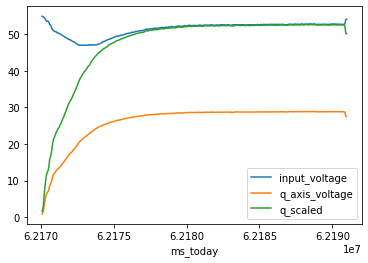

<AxesSubplot:xlabel='ms_today'>

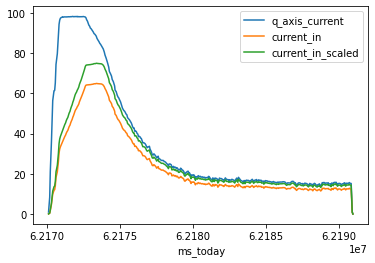

In [20]:
data['q_scaled'] = data['q_axis_voltage']*3**0.5/0.95
data[['input_voltage', 'q_axis_voltage', 'q_scaled']].plot()
plt.show()
data['current_in_scaled'] = data['current_in'] * 2 / 3**0.5
data[['q_axis_current', 'current_in', 'current_in_scaled']].plot()